# Exploration of Ghent dataset

Load dataset with all metadata and pre-processing steps.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

In [20]:
# Dataset Gent Opera
df = pd.read_csv("../Materials/Cleaned_DatasetGENT.csv", encoding='Latin-1', index_col=False)
sns.set_palette("Set2")

df.head()

,Unnamed: 0,Date,Production,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season
0,0,1940-10-26,De Vroolijke vrouwtjes van Windsor,False,920041,De Lustige Vrouwtjes van Windsor,DUI,Otto Nicolai,1849,Die lustigen Weiber von Windsor,zangspel,1940-1941
1,1,1940-10-27,De Vroolijke vrouwtjes van Windsor,False,594412,De Lustige Vrouwtjes van Windsor,DUI,Otto Nicolai,1849,Die lustigen Weiber von Windsor,zangspel,1940-1941
2,2,1940-10-27,Het Land der Meisjes,False,793215,Het Land der Meisjes,NaN,NaN,NaN,NaN,NaN,1940-1941
3,3,1940-11-03,1e Operaconcert,False,171545,1e Operaconcert,NaN,NaN,NaN,NaN,NaN,1940-1941
4,4,1940-11-03,Het Land der Meisjes,False,532356,Het Land der Meisjes,NaN,NaN,NaN,NaN,NaN,1940-1941


In [5]:
#remove all trailing and leading whitespaces.
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue
        
#convert the date column to datetime.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

## TOP 10
### Productions


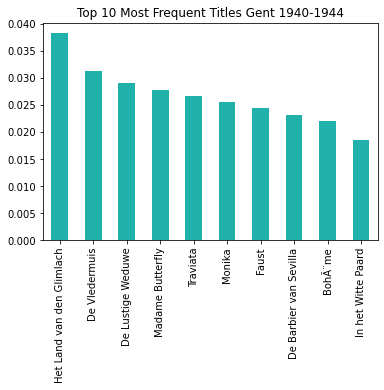

In [7]:
# Normalised Titles
df['Normalised title'].value_counts(normalize=True).head(10).plot(kind='bar', color = 'lightseagreen')
plt.title("Top 10 Most Frequent Titles Gent 1940-1944");

### Composers

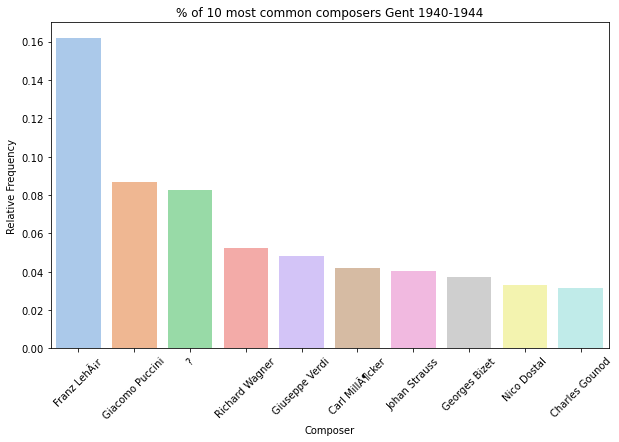

In [8]:
comp = df['Composer'].value_counts(normalize=True).head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=comp.index, y=comp.values, palette='pastel')
plt.title('% of 10 most common composers Gent 1940-1944')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.show()

### Dutch Composers

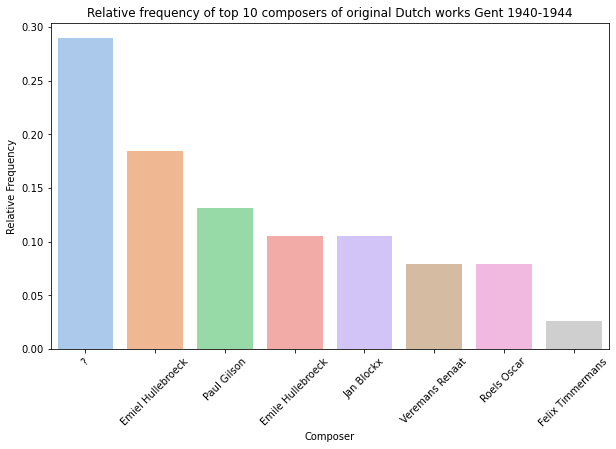

In [9]:
df2 = df[df["Original language"] == 'NL']
#isolate all Dutch productions

nl = df2['Composer'].value_counts(normalize=True).head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=nl.index, y=nl.values, palette='pastel')
plt.title('Relative frequency of top 10 composers of original Dutch works Gent 1940-1944')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Show the productions with the composer '?'
productions_with_unknown_composer = df[df['Composer'] == '?']['Production'].unique()
productions_with_unknown_composer

array(['Tageszeifen der Liebe', 'Die Gleswister',
       'De Neef uit het Oosten', 'De weg naar het paradijs',
       'War ihr Wollt', 'De Dans met de Keizerin', 'Peperbol',
       "'t Was de Wind", 'Manina', 'Een Meisje als Gij'], dtype=object)

## Distribution of Wagner and German productions

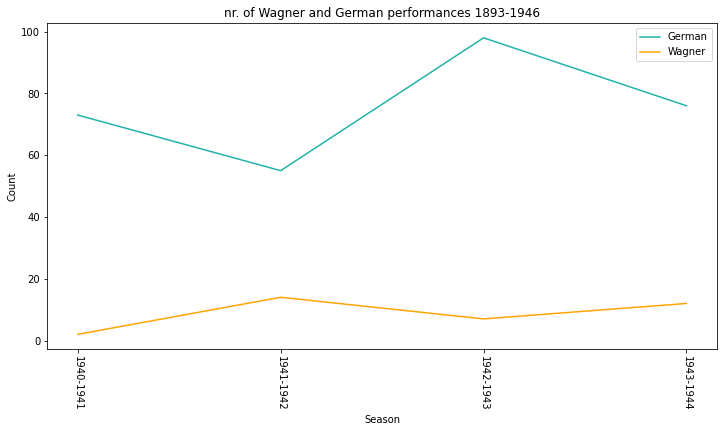

In [12]:
# Select the correct seasons
df_filtered = df[(df['Season'] >= '1940-1941') & (df['Season'] <= '1943-1944')]

#create a subdataset with all Wagner performances Gent 1940-1944
wag = df_filtered[df_filtered['Composer'] == 'Richard Wagner']
DUI = df_filtered[df_filtered['Original language'] == 'DUI']

fig, ax = plt.subplots(figsize=(12, 6))

#create 2 series: one for all German performances and one for only the wagner performances
counts1 = DUI['Season'].value_counts().sort_index(axis=0)
counts2 = wag['Season'].value_counts().sort_index(axis=0)

#sort the index so that the seasons occur chronologically on the plot.
counts2 = counts2.sort_index()
counts1 = counts1.sort_index()

# Generate x and y data for the line plot, otherwise it doesn't plot all the index labels
x = counts1.index
y = counts1.values

x2 = counts2.index
y2 = counts2.values

#we make a lineplot
ax.plot(x, y, color='lightseagreen', label='German')
ax.plot(x2, y2, color = 'orange', label = 'Wagner')

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.legend()
ax.set_title('nr. of Wagner and German performances 1893-1946')

plt.show()

## French, Italian, German composers

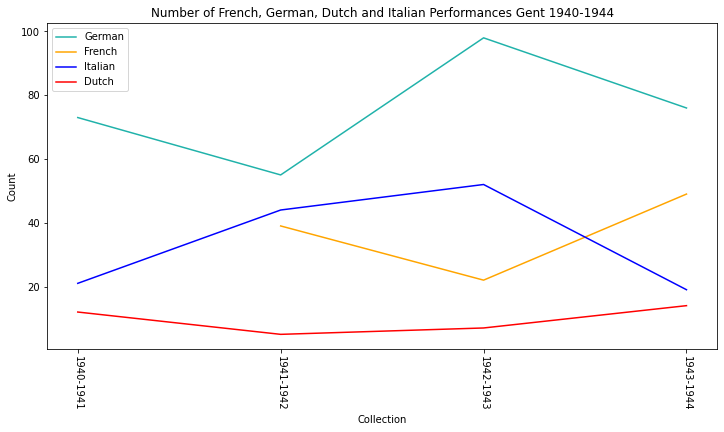

In [13]:
#create a subdataset with all French, German, Dutch and Italian performances Gent 1940-1944
FR = df_filtered[df_filtered['Original language'] == 'FR']
DUI = df_filtered[df_filtered['Original language'] == 'DUI']
ITA = df_filtered[df_filtered['Original language'] == 'ITA']
NL = df_filtered[df_filtered['Original language'] == 'NL']

fig, ax = plt.subplots(figsize=(12, 6))

#create 3 series for French, German, and Italian performances
counts1 = DUI['Season'].value_counts().sort_index()
counts2 = FR['Season'].value_counts().sort_index()
counts3 = ITA['Season'].value_counts().sort_index()
counts4 = NL['Season'].value_counts().sort_index()


#sort the index so that the seasons occur chronologically on the plot
counts1 = counts1.sort_index()
counts2 = counts2.sort_index()
counts3 = counts3.sort_index()
counts4 = counts4.sort_index()


# Generate x and y data for the line plot, otherwise it doesn't plot all the index labels
x = counts1.index
y = counts1.values

x2 = counts2.index
y2 = counts2.values

x3 = counts3.index
y3 = counts3.values

x4 = counts4.index
y4 = counts4.values

#plot the line plots for each language
ax.plot(x, y, color='lightseagreen', label='German')
ax.plot(x2, y2, color='orange', label='French')
ax.plot(x3, y3, color='blue', label='Italian')
ax.plot(x4, y4, color='red', label='Dutch')


ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

ax.set_xlabel('Collection')
ax.set_ylabel('Count')
ax.legend()
ax.set_title('Number of French, German, Dutch and Italian Performances Gent 1940-1944')

plt.show()

## Normalised distribution of composers

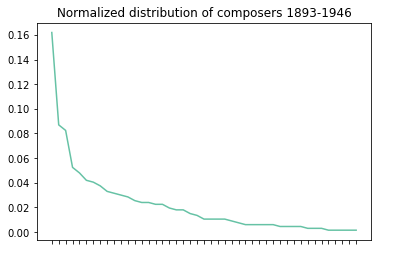

In [14]:
import warnings
warnings.filterwarnings("ignore")
comp_dis = df['Composer'].value_counts(normalize=True)
plt.plot(comp_dis)
plt.xticks(color='white')
plt.title('Normalized distribution of composers 1893-1946')
plt.show()

# Language distributions

In [15]:
counts = df.groupby('Season')['Original language'].value_counts().unstack().fillna(0)
#Use grouby, unstack and fillna so that zero is displayed when a language is not featured in a group (season).

# To maintain readability of the table, we only keep the five most common languages
counts = counts[['DUI', 'FR', 'NL', 'ITA']]

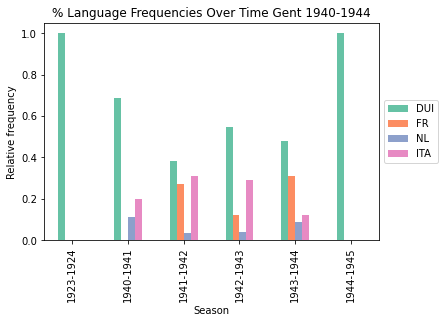

In [17]:
# Relative frequencies
total_counts = counts.sum(axis=1) #we sum across rows to get total of performances per season

# compute the relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='bar')

plt.title('% Language Frequencies Over Time Gent 1940-1944')
plt.xlabel('Season')
plt.ylabel('Relative frequency')
plt.legend(loc = 0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

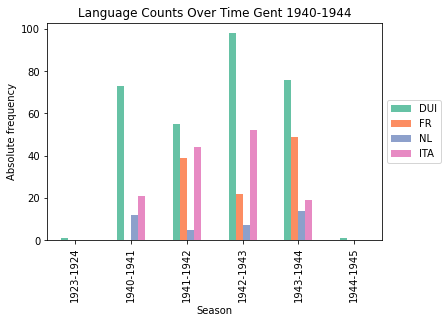

In [18]:
# Absolute frequencies
counts.plot(kind='bar')
plt.title('Language Counts Over Time Gent 1940-1944')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')
plt.legend(loc = 0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

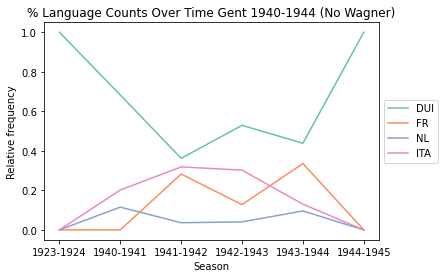

In [19]:
# No Wagner
#Drop all rows containing Wagner
df2 = df.drop(df[df['Composer'].str.contains('Wagner', na = False)].index)

#same as previously but without wagner
counts = df2.groupby('Season')['Original language'].value_counts().unstack().fillna(0)
counts = counts[['DUI', 'FR', 'NL', 'ITA']]

total_counts = counts.sum(axis=1)

rel_counts = counts.divide(total_counts, axis=0)
rel_counts.plot(kind='line') #make sure it's a lineplot.

plt.title('% Language Counts Over Time Gent 1940-1944 (No Wagner)')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.legend(loc = 0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()